In [1]:

import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import numpy 
import numpy as np

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

from clean_split_data import clean_data
from clean_split_data import split_data
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.pop('Unnamed: 32')

data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)


In [3]:
tree_count = [1, 10, 20, 30, 50, 75]
list_mse = []

In [4]:
for trees in tree_count:
    gradient_model = GradientBoostingRegressor(n_estimators=trees, learning_rate=0.1, max_depth=10, random_state=42)
    gradient_model.fit(X_train, (y_train))
    y_pred = gradient_model.predict(X_test)
    list_mse.append(mean_squared_error(y_test, y_pred))

Text(0.5, 1.0, 'MSE for different n_estimators')

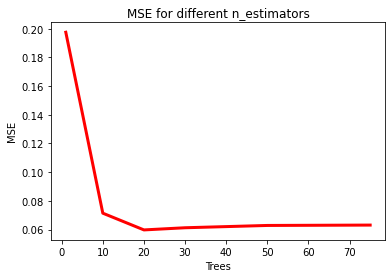

In [5]:
plt.plot(tree_count, list_mse, c='r', linewidth=3)
plt.xlabel('Trees')
plt.ylabel('MSE')
plt.title('MSE for different n_estimators')

Therefore 20 n_estimators is best

In [6]:
tree_count = 20
gradient_model = GradientBoostingRegressor(n_estimators=tree_count, learning_rate=0.1, max_depth=10, random_state=42)
gradient_model.fit(X_train,(y_train))
y_predict = np.round(gradient_model.predict(X_test))
MSE_value = mean_squared_error(y_test, y_predict)
accuracy = np.round(accuracy_score(y_test,y_predict)*100)

print(accuracy)
print(MSE_value)

93.0
0.07017543859649122


In [7]:
MSE_Value_2 = []
Acc_value_2 = []
MSE_Value_1 = []
Acc_value_1 = []
selected_features = []

for K in range(9):
    K=K+1
    sfs_forward = SequentialFeatureSelector(GradientBoostingRegressor(), 
                                            n_features_to_select=K,
                                            direction='forward').fit(X_train, y_train)

    f_names = np.array(data.columns)
    selected = sfs_forward.get_support(indices=True)
#     print("Selected input features using Forward Stepwise Selection:\n", f_names[selected])
    selected_features.append(f_names[selected])
    columns_names = list(f_names[selected])
    
    if 'diagnosis' in columns_names:
        columns_names.remove('diagnosis')
    if 'id' in columns_names:
        columns_names.remove('id')
    
    x_manip = data[columns_names]
    print(len(x_manip))

    y = data.diagnosis
    
    print(len(y))

    X_train_manip, X_test_manip, y_train_2, y_test_2 = train_test_split(x_manip, y, test_size=0.2, random_state=42)
    

    model_2  = gradient_model.fit(X_train_manip,(y_train_2))
    y_predict_2 = model_2.predict(X_test_manip)
    y_predict_1 = model_2.predict(X_train_manip)
    
    y_predict_2 = np.round(y_predict_2)
    y_predict_1 = np.round(y_predict_1)

    accuracy_2 = accuracy_score(y_test_2,y_predict_2)
    accuracy_1 = accuracy_score(y_train_2,y_predict_1)
    MSE_value_2 = mean_squared_error(y_test_2, y_predict_2)
    MSE_value_1 = mean_squared_error(y_train_2, y_predict_1)
    
    Acc_value_2.append(accuracy_2)
    MSE_Value_2.append(MSE_value_2)
    Acc_value_1.append(accuracy_1)
    MSE_Value_1.append(MSE_value_1)
    
    
    

569
569
569
569
569
569
569
569
569
569
569
569
569
569
569
569
569
569


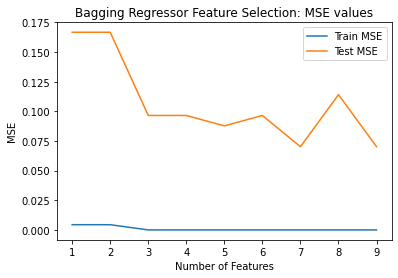

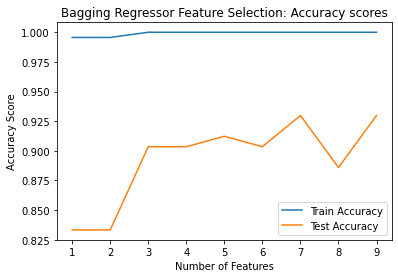

In [8]:
ks= [1,2,3,4,5,6,7,8,9]

plt.plot(ks, MSE_Value_1, label = 'Train MSE')
plt.plot(ks, MSE_Value_2, label = "Test MSE")
plt.xlabel("Number of Features")
plt.ylabel("MSE")
plt.title("Bagging Regressor Feature Selection: MSE values")
plt.legend()
plt.show()

#plotting overall r performacnce based on k
plt.plot(ks, Acc_value_1, label = 'Train Accuracy')
plt.plot(ks, Acc_value_2, label = "Test Accuracy")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score")
plt.title("Bagging Regressor Feature Selection: Accuracy scores")
plt.legend()
plt.show()

In [9]:
columns_names = list(('radius_mean', 'perimeter_mean', 'concavity_mean'))

x_manip_GB = data[columns_names]

y = data.diagnosis

X_train_manip, X_test_manip, y_train_2, y_test_2 = train_test_split(x_manip_GB, y, test_size=0.2, random_state=42)

In [10]:
model_2  = gradient_model.fit(X_train_manip,(y_train_2))
y_predict_2 = np.round(model_2.predict(X_test_manip))

accuracy_2 = np.round(accuracy_score(y_test_2,y_predict_2)*100)
MSE_value_2 = mean_squared_error(y_test_2, y_predict_2)

print(accuracy_2)
print(MSE_value_2)



90.0
0.09649122807017543


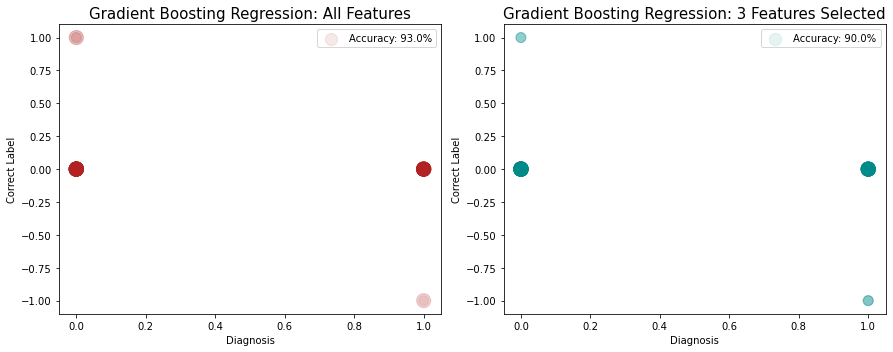

In [11]:
fig,ax = plt.subplots(1,2,figsize=(12.5,5))
ax[0].scatter(y_test, y_predict - y_test, marker='o',s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'FireBrick',label = "Accuracy: "+str(accuracy)+"%")
ax[0].set_title('Gradient Boosting Regression: All Features', fontsize=15)
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].legend()

ax[1].scatter(y_test_2, y_predict_2 - y_test_2,s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'DarkCyan',label = "Accuracy: "+str(accuracy_2)+"%")
ax[1].set_title('Gradient Boosting Regression: 3 Features Selected', fontsize=15)
ax[1].set_xlabel('Diagnosis')
ax[1].set_ylabel('Correct Label')
ax[1].legend()

plt.tight_layout()

### Defining New, Optimized Classifier

In [15]:
selected_features[2]

array(['radius_mean', 'perimeter_mean', 'concavity_mean'], dtype=object)

In [16]:
def feature_names():
    '''
    Returns array of input features of best performing backwards stepwise selection test.
    '''
    
    return ['radius_mean', 'perimeter_mean', 'concavity_mean']

In [18]:
def predict(test_data):
    '''
    Takes test data and uses classifier to predict boolean output.
    '''
    X = data[feature_names()]
    y = data.diagnosis
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    gradient_model = GradientBoostingRegressor(n_estimators=20, learning_rate=0.1,max_depth=10, random_state=42)
    gradient_model.fit(X_train,(y_train))
    y_pred = gradient_model.predict(test_data)
    
    return y_pred